In [2]:
from boututils.datafile import DataFile
from boutdata.collect import collect
from boutdata.data import BoutData
import os, sys
import matplotlib

import matplotlib.pyplot as plt
import xbout
import pandas as pd
import numpy as np
import xarray as xr

from boutdata.restart import addvar
import glob
import shutil
import scipy
import netCDF4 as nc

sys.path.append(r"/home/mike/work/sdtools")


from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.neutral_transport import NeutralTransport
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from hermes3.balance1d import *
from hermes3.selectors import *

from hermes3.utils import *
# from code_comparison.code_comparison import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
db = CaseDB(
    case_dir = r"/home/mike/work/cases",
    grid_dir = r"/home/mike/work/cases"
    )

In [6]:
toload = [ 
    # dict(name="base", id="upst1be-2e19_MASTER_RERUN_term_decomposition", unnormalise = True), 
    dict(name="base", id="upst1b-2e19_MASTER_RERUN", unnormalise = True), 
    dict(name="alpha_0.02", id="upst1bk-2e19_MASTER_RERUN_core_condfluxlim_0.02", unnormalise = True), 

]
cs = {}
for case in toload:
    cs[case["name"]] = db.load_case_2D(case["id"], use_squash = False, verbose = True, unnormalise = case["unnormalise"], unnormalise_geom = case["unnormalise"])
    cs[case["name"]].extract_2d_tokamak_geometry()


/home/mike/work/boutdata/src/boutdata/data.py:761: AlwaysWarning: While building x, y, z coordinate arrays, an exception occured: [Errno 2] No such file or directory: '"g3e4f1-lores_widev2_nonortho_xpoint_allf.nc"'
Evaluating non-scalar options not available
  alwayswarn(


TESTING
- Reading case upst1b-2e19_MASTER_RERUN
-----------------------


/home/mike/work/xbout/xbout/load.py:1129: UserWarning: Will drop all variables containing the dimensions 't' because they are not recognised
  warn(



Unnormalising with xHermes
TESTING
- Reading case upst1bk-2e19_MASTER_RERUN_core_condfluxlim_0.02
-----------------------


/home/mike/work/boutdata/src/boutdata/data.py:761: AlwaysWarning: While building x, y, z coordinate arrays, an exception occured: [Errno 2] No such file or directory: '"g3e4f1-lores_widev2_nonortho_xpoint_allf.nc"'
Evaluating non-scalar options not available
  alwayswarn(
/home/mike/work/xbout/xbout/load.py:1129: UserWarning: Will drop all variables containing the dimensions 't' because they are not recognised
  warn(



Unnormalising with xHermes


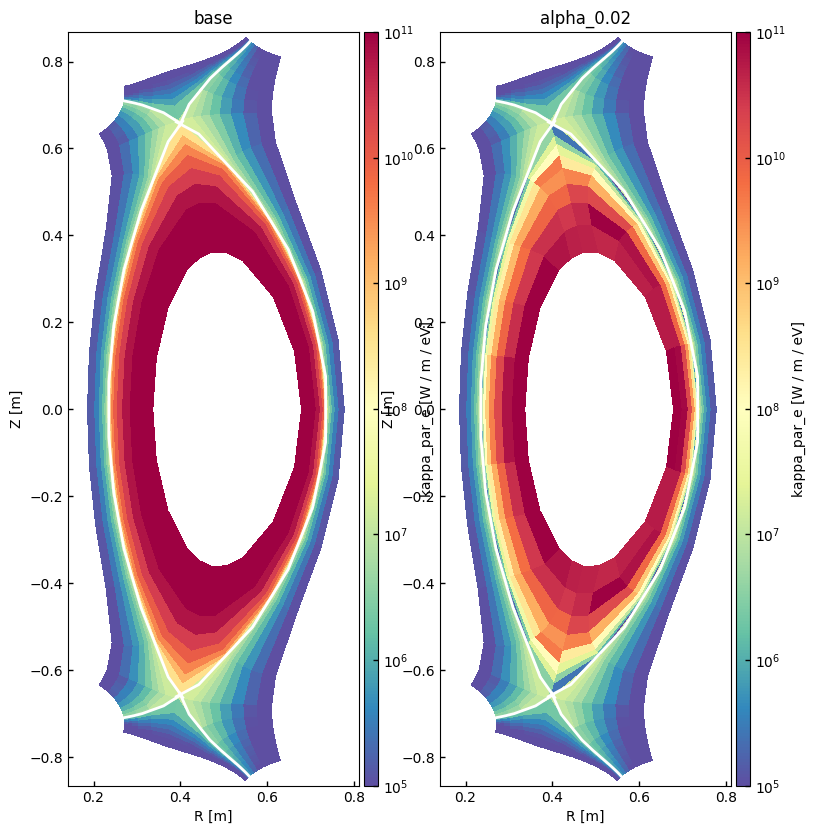

In [4]:
fig, axes = plt.subplots(1 ,len(cs), figsize = (4*len(cs)*1.1, 4.5*2*2), dpi = 100)

for i, name in enumerate(cs):
    ds = cs[name].ds
    if "t" in ds.sizes: ds = ds.isel(t = -1)
    ds["kappa_par_e"].hermesm.clean_guards().bout.polygon(ax = axes[i], cmap = "Spectral_r", logscale = True, vmax = 1e11, vmin = 1e5)
    axes[i].set_title(name)